In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib import pyplot as plt
import json
import gc
import os

In [2]:
gc.collect()

0

In [3]:
with open("../data/samples/read_ids.json", "r") as f:
    read_ids = json.load(f)
    
read_ids = [[{"sample_id": sample_id, "read_id": read_id} for read_id in read_ids[sample_id]] for sample_id in read_ids]

read_ids_df = pd.DataFrame(read_ids[0] + read_ids[1] + read_ids[2])
read_ids_df

,sample_id,read_id
0,GS003,JCVI_READ_1091145030183
1,GS003,JCVI_READ_1095403403926
2,GS003,JCVI_READ_1095403478765
3,GS003,JCVI_READ_1095403421433
4,GS003,JCVI_READ_1095403403927
...,...,...
29995,GS037,JCVI_READ_1095964463383
29996,GS037,JCVI_READ_1095964465303
29997,GS037,JCVI_READ_1095964452922
29998,GS037,JCVI_READ_1095964451194


# MASH

In [19]:
def calculate_mash_mindist(path):
    reg = {}

    with open(path, "r") as f:

        count = 0
        for line in f:
            rec = line.split("\t")
            distance = float(rec[2])

            if reg.get(rec[0]) == None:
                reg[rec[0]] = 1
            elif reg.get(rec[0]) > distance:
                reg[rec[0]] = distance

            if reg.get(rec[1]) == None:
                reg[rec[1]] = 1
            elif reg.get(rec[1]) > distance:
                reg[rec[1]] = distance


            count += 1
            if count % int(10e6) == 0:
                print(count)
                
    return pd.DataFrame([{
        'read_id': x,
        'mindist': reg[x]
    } for x in reg])

def get_jaccard_estimate(vals, K):
    return np.exp(-1*K*vals)/(2-np.exp(-1*K*vals))

### GS003_GS005

In [8]:
aux_mindist_path = "../distances/mash-k10-s100/GS003_GS005.mindist"
if os.path.exists(aux_mindist_path):
    mash_min_GS003_GS005_df = pd.read_csv(aux_mindist_path)
else:
    mash_min_GS003_GS005_df = calculate_mash_mindist("../distances/mash-k10-s100/GS003_GS005.dist")
    mash_min_GS003_GS005_df.to_csv(aux_mindist_path, index=False)
    
mash_min_GS003_GS005_df

,read_id,mindist
0,JCVI_READ_1091145030183,0.235138
1,JCVI_READ_1091150264015,0.235138
2,JCVI_READ_1095403403926,0.284297
3,JCVI_READ_1095403478765,0.256495
4,JCVI_READ_1095403421433,0.256495
...,...,...
19995,JCVI_READ_1091143643227,0.284297
19996,JCVI_READ_1091143669563,0.256495
19997,JCVI_READ_1091143669564,0.284297
19998,JCVI_READ_1091143643228,0.256495


0.24512576852


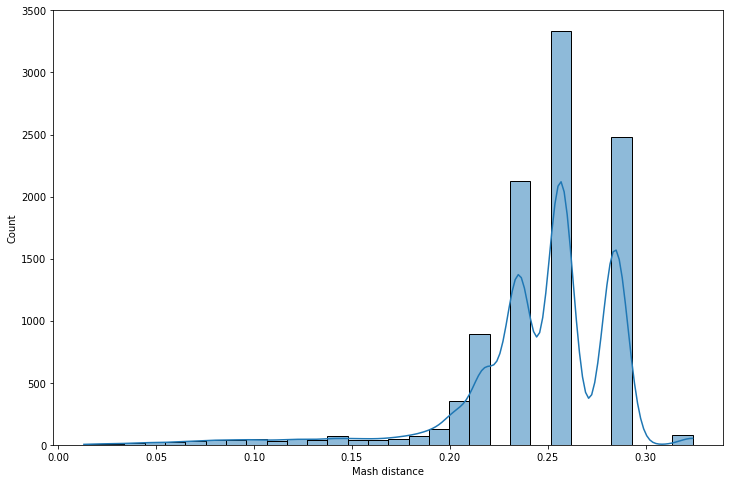

In [9]:
aux_df = mash_min_GS003_GS005_df.merge(read_ids_df, how='left', on="read_id")
print(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values.mean())
plt.figure(figsize=(12,8))
sns.histplot(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values, kde=True, bins=30)
plt.xlabel("Mash distance")
plt.show()

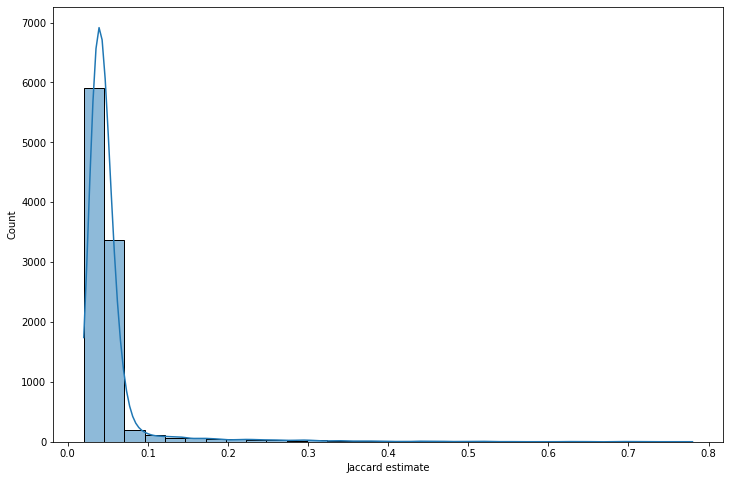

In [21]:
vals = get_jaccard_estimate(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values, 10)
plt.figure(figsize=(12,8))
sns.histplot(vals, kde=True, bins=30)
plt.xlabel("Jaccard estimate")
plt.show()

### GS003_GS037

In [24]:
aux_mindist_path = "../distances/mash-k10-s100/GS003_GS037.mindist"
if os.path.exists(aux_mindist_path):
    mash_min_GS003_GS037_df = pd.read_csv(aux_mindist_path)
else:
    mash_min_GS003_GS037_df = calculate_mash_mindist("../distances/mash-k10-s100/GS003_GS037.dist")
    mash_min_GS003_GS037_df.to_csv(aux_mindist_path, index=False)
    
mash_min_GS003_GS037_df

,read_id,mindist
0,JCVI_READ_1091145030183,0.256495
1,JCVI_READ_1096013066145,0.235138
2,JCVI_READ_1095403403926,0.284297
3,JCVI_READ_1095403478765,0.256495
4,JCVI_READ_1095403421433,0.256495
...,...,...
19995,JCVI_READ_1095964463383,0.235138
19996,JCVI_READ_1095964465303,0.203377
19997,JCVI_READ_1095964452922,0.217853
19998,JCVI_READ_1095964451194,0.217853


0.24992508219


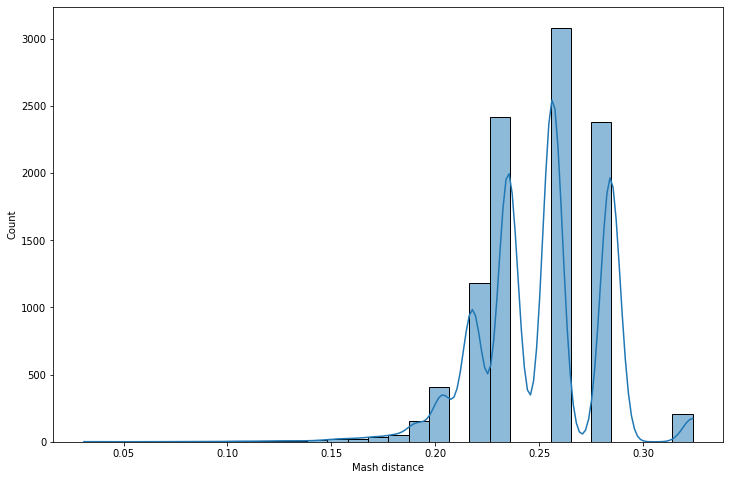

In [25]:
aux_df = mash_min_GS003_GS037_df.merge(read_ids_df, how='left', on="read_id")
print(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values.mean())
plt.figure(figsize=(12,8))
sns.histplot(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values, kde=True, bins=30)
plt.xlabel("Mash distance")
plt.show()

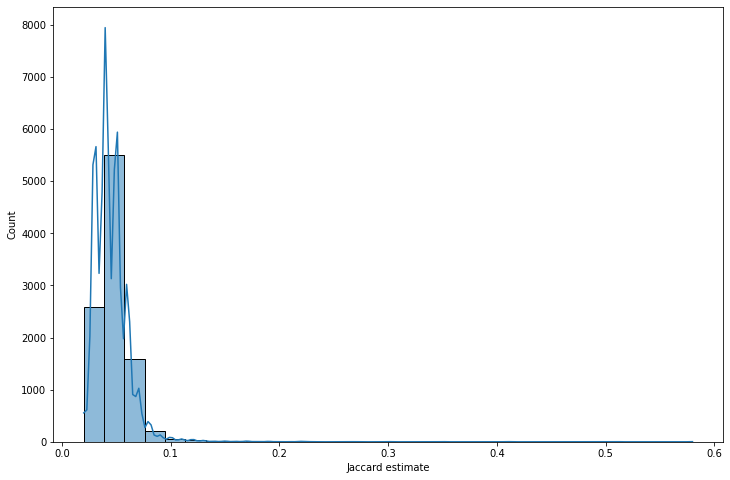

In [26]:
vals = get_jaccard_estimate(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values, 10)
plt.figure(figsize=(12,8))
sns.histplot(vals, kde=True, bins=30)
plt.xlabel("Jaccard estimate")
plt.show()

In [32]:
sv1 = mash_min_GS003_GS005_df.merge(read_ids_df, how='left', on="read_id")
sv1 = sv1[sv1["sample_id"] == "GS003"]["mindist"].values
sv2 = mash_min_GS003_GS037_df.merge(read_ids_df, how='left', on="read_id")
sv2 = sv2[sv2["sample_id"] == "GS003"]["mindist"].values

jsv1 = get_jaccard_estimate(sv1, 10)
jsv2 = get_jaccard_estimate(sv2, 10)

print(stats.kstest(sv1, 'norm'))
print(stats.kstest(sv2, 'norm'))

stats.ttest_ind(sv1,sv2, equal_var=False, alternative='less')

KstestResult(statistic=0.521842141928761, pvalue=0.0)
KstestResult(statistic=0.5596621836468985, pvalue=0.0)


Ttest_indResult(statistic=-9.457991135085733, pvalue=1.7555517349995687e-21)

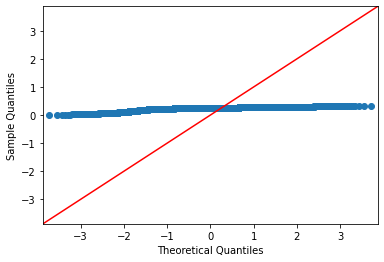

In [28]:
fig = sm.qqplot(sv1, line='45')

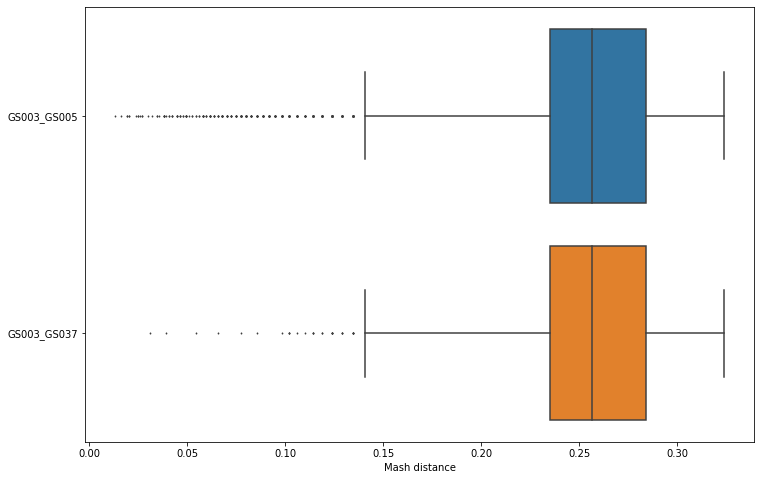

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(data=pd.DataFrame(np.array([sv1,sv2]).T, columns=["GS003_GS005","GS003_GS037"]), 
            orient='h', fliersize=1, whis=2).set(xlabel="Mash distance")
plt.show()

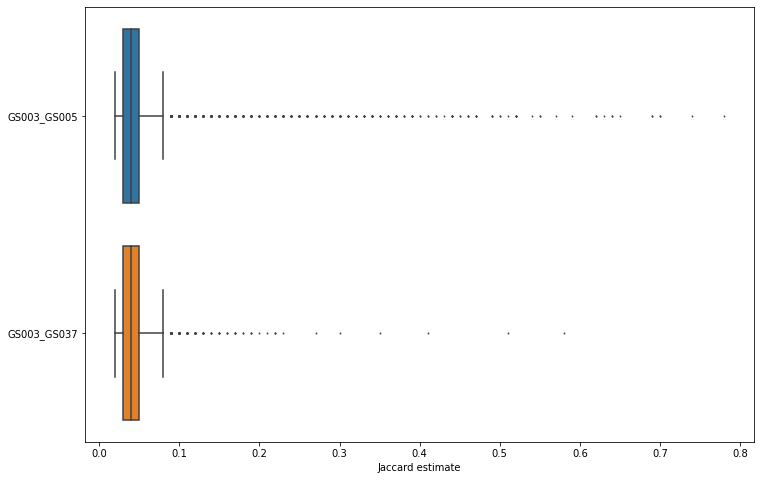

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(data=pd.DataFrame(np.array([jsv1,jsv2]).T, columns=["GS003_GS005","GS003_GS037"]), 
            orient='h', fliersize=1, whis=2).set(xlabel="Jaccard estimate")
plt.show()

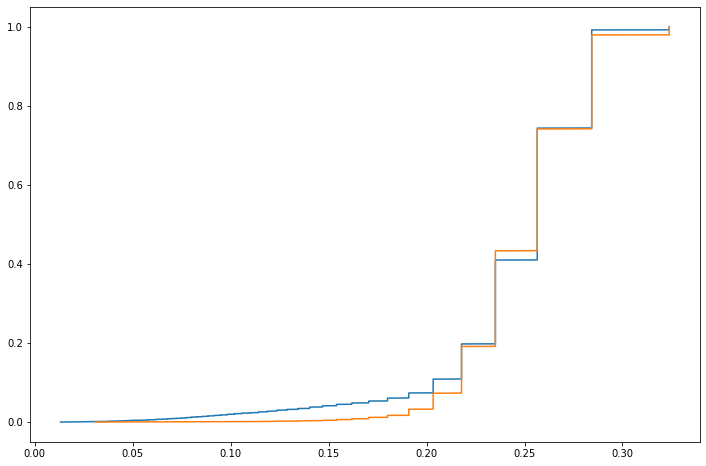

In [30]:
ecdf1 = ECDF(sv1)
ecdf2 = ECDF(sv2)
plt.figure(figsize=(12,8))
plt.plot(ecdf1.x, ecdf1.y)
plt.plot(ecdf2.x, ecdf2.y)
plt.show()

# OMH

In [38]:
def calculate_omh_mindist(path):
    reg = {}

    with open(path, "r") as f:

        count = 0
        for line in f:
            rec = line.split(" ")
            distance = float(rec[2])

            if reg.get(rec[0]) == None:
                reg[rec[0]] = 0
            elif reg.get(rec[0]) < distance:
                reg[rec[0]] = distance

            if reg.get(rec[1]) == None:
                reg[rec[1]] = 0
            elif reg.get(rec[1]) < distance:
                reg[rec[1]] = distance


            count += 1
            if count % int(10e6) == 0:
                print(count)
                
    return pd.DataFrame([{
        'read_id': x,
        'mindist': reg[x]
    } for x in reg])

### GS003_GS005

In [39]:
aux_mindist_path = "../distances/omh-k10-l1-m100/GS003_GS005.mindist"
if os.path.exists(aux_mindist_path):
    omh_min_GS003_GS005_df = pd.read_csv(aux_mindist_path)
else:
    omh_min_GS003_GS005_df = calculate_omh_mindist("../distances/omh-k10-l1-m100/GS003_GS005.dist")
    omh_min_GS003_GS005_df.to_csv(aux_mindist_path, index=False)
    
omh_min_GS003_GS005_df

,read_id,mindist
0,JCVI_READ_1091145030183,0.03
1,JCVI_READ_1091150264015,0.04
2,JCVI_READ_1091150264020,0.03
3,JCVI_READ_1091150264027,0.03
4,JCVI_READ_1091150264052,0.03
...,...,...
19995,JCVI_READ_1091145245693,0.03
19996,JCVI_READ_1091145137484,0.03
19997,JCVI_READ_1091145209400,0.04
19998,JCVI_READ_1091145110797,0.03


0.042891000000000006


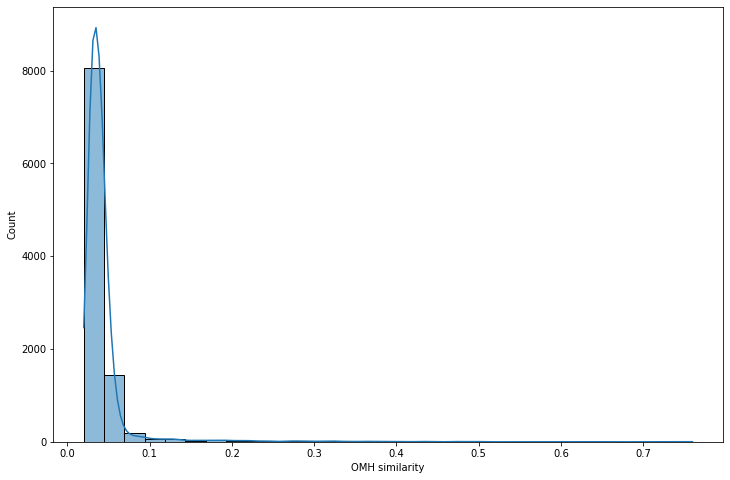

In [41]:
aux_df = omh_min_GS003_GS005_df.merge(read_ids_df, how='left', on="read_id")
print(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values.mean())
plt.figure(figsize=(12,8))
sns.histplot(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values, kde=True, bins=30)
plt.xlabel("OMH similarity")
plt.show()

### GS003_GS037

In [42]:
aux_mindist_path = "../distances/omh-k10-l1-m100/GS003_GS037.mindist"
if os.path.exists(aux_mindist_path):
    omh_min_GS003_GS037_df = pd.read_csv(aux_mindist_path)
else:
    omh_min_GS003_GS037_df = calculate_omh_mindist("../distances/omh-k10-l1-m100/GS003_GS037.dist")
    omh_min_GS003_GS037_df.to_csv(aux_mindist_path, index=False)
    
omh_min_GS003_GS037_df

,read_id,mindist
0,JCVI_READ_1091145030183,0.06
1,JCVI_READ_1096013066145,0.04
2,JCVI_READ_1095994149980,0.04
3,JCVI_READ_1096013056107,0.02
4,JCVI_READ_1095994149981,0.03
...,...,...
19995,JCVI_READ_1091145245693,0.04
19996,JCVI_READ_1091145137484,0.05
19997,JCVI_READ_1091145209400,0.04
19998,JCVI_READ_1091145110797,0.07


0.0396


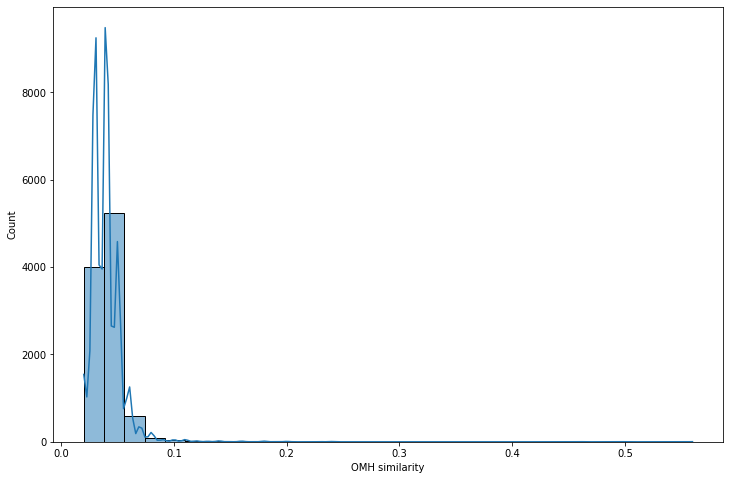

In [43]:
aux_df = omh_min_GS003_GS037_df.merge(read_ids_df, how='left', on="read_id")
print(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values.mean())
plt.figure(figsize=(12,8))
sns.histplot(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values, kde=True, bins=30)
plt.xlabel("OMH similarity")
plt.show()

In [45]:
sv1 = omh_min_GS003_GS005_df.merge(read_ids_df, how='left', on="read_id")
sv1 = sv1[sv1["sample_id"] == "GS003"]["mindist"].values
sv2 = omh_min_GS003_GS037_df.merge(read_ids_df, how='left', on="read_id")
sv2 = sv2[sv2["sample_id"] == "GS003"]["mindist"].values

print(stats.kstest(sv1, 'norm'))
print(stats.kstest(sv2, 'norm'))

stats.ttest_ind(sv1,sv2, equal_var=False, alternative='greater')

KstestResult(statistic=0.5079783137169019, pvalue=0.0)
KstestResult(statistic=0.5079783137169019, pvalue=0.0)


Ttest_indResult(statistic=7.907938854638636, pvalue=1.4106180134207295e-15)

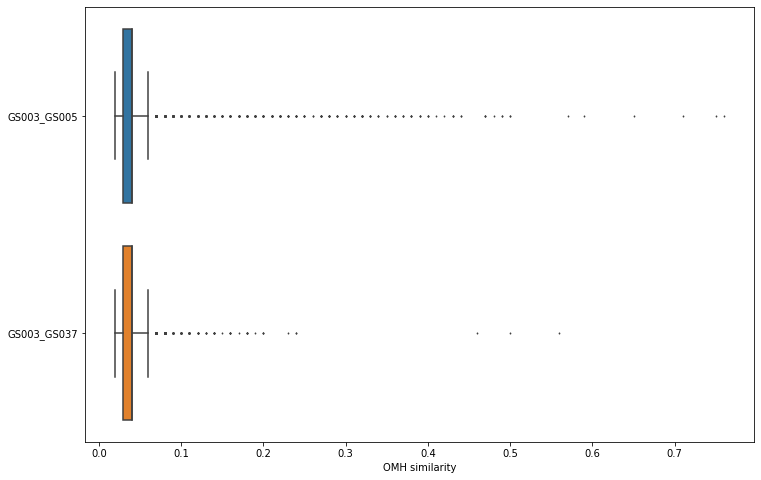

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(data=pd.DataFrame(np.array([sv1,sv2]).T, columns=["GS003_GS005","GS003_GS037"]), 
            orient='h', fliersize=1, whis=2).set(xlabel="OMH similarity")
plt.show()

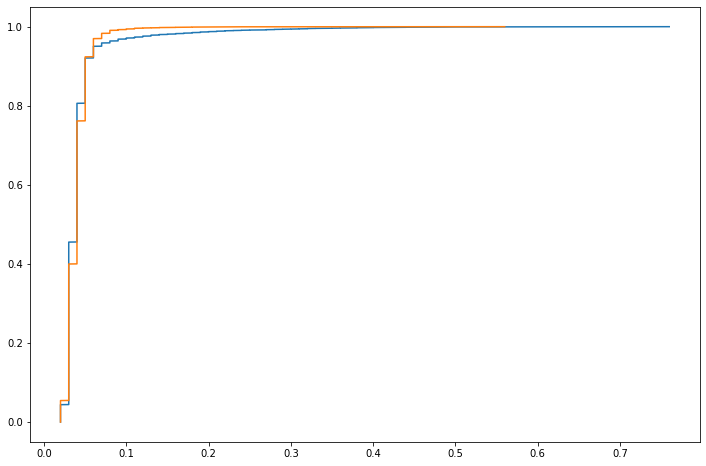

In [47]:
plt.figure(figsize=(12,8))
ecdf1 = ECDF(sv1)
ecdf2 = ECDF(sv2)
plt.plot(ecdf1.x, ecdf1.y)
plt.plot(ecdf2.x, ecdf2.y)
plt.show()

In [5]:
import re

In [21]:
f003 = open("../data/asm_samples/GS003.asm.fa", "a")
f005 = open("../data/asm_samples/GS005.asm.fa", "a")
f037 = open("../data/asm_samples/GS037.asm.fa", "a")


path = "../data/CAM_PROJ_GOS.asm.fa"

with open(path, "r") as f:

    count = 0
    keep_seq = None
    
    for line in f:
        if count%2 == 0:
            match = re.search("\/sample_name=\w+",line)
            sample_name_sub = line[match.start():match.end()]
            if "GS001a" in sample_name_sub:
                f003.write(line)
                keep_seq = "GS003"
            elif "GS005" in sample_name_sub:
                f005.write(line)
                keep_seq = "GS005"
            elif "GS037" in sample_name_sub:
                f037.write(line)
                keep_seq = "GS037"
                
        else:
            if "GS003" == keep_seq:
                f003.write(line)               
            elif "GS005" == keep_seq:
                f005.write(line)
            elif "GS037" == keep_seq:
                f037.write(line)
        
            keep_seq = None
        
        
        count += 1
        if count % int(10e6) == 0:
            print(count)
            
f003.close()  
f005.close()  
f037.close()  

AttributeError: 'NoneType' object has no attribute 'start'